<span style="font-size: 5em">🦜</span>

# __LangGraph Essentials__
## Lab 1: States & Nodes

<img src="../assets/States_Nodes.png" align="left" width="900" style="margin-right:15px;"/>


LangGraph organizes workflows as graphs where nodes are functions and edges define execution flow. All nodes share a common state that gets passed between them. This notebook shows how to define state, create nodes, and connect them into an executable graph.


In [2]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

<a id='state_definition'></a>

In [ ]:
class State(TypedDict):
    nlist: List[str]
    another_value: int

<a id='node_function'></a>


In [ ]:
def node_a(state: State) -> State:
    print(f"node a is receiving {state['nlist']}")
    note = "Hello World from Node a"
    return(State(nlist = [note], another_value=10))

In [10]:
def node_b(state: State) -> State:
    new_note = 'Jello world'
    new_val = 100000
    return State(nlist = [new_note], another_value=new_val)


<a id='graph_building'></a>

In [11]:
builder = StateGraph(State)

builder.add_node("a", node_a)
builder.add_node('b', node_b)

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", END)

graph = builder.compile()

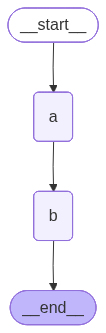

In [12]:
display(Image(graph.get_graph().draw_mermaid_png()))
# print(graph.get_graph().draw_mermaid())

<a id='graph_invoke'></a>

In [14]:
initial_state = State(
    nlist = ["Hello Node a, how are you?"],
    another_value=0
)
graph.invoke(initial_state)

node a is receiving ['Hello Node a, how are you?']


{'nlist': ['Jello world']}

## Takeaways

Setup:

- State: All nodes share the same [state](#state_definition) which can be a Python TypedDict, dataclass, or a Pydantic BaseModel
- Nodes: Defined as simple [Python functions](#node_function) that receive state as input and return updated state

Execution (invoke):

- Runtime: When you call [invoke](#graph_invoke), the graph initializes the input state from your invoke statement and determines which nodes to run
- State Flow: Each node receives the current state as input, executes its logic, and returns an updated state
- Graph Return: After all nodes complete execution, the graph returns the final state value

Try Next:

- Add another node to the [graph](#graph_building) and connect it with edges
- Modify the print statement in the [node function](#node_function) or change the initial state message
- Extend the [State TypedDict](#state_definition) with additional fields to pass more data between nodes